Aim: (A) Consider the following dataset. Write a program to demonstrate the working of the decision tree based ID3 algorithm.

In [1]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=69c1226b1f68fb574ffc9c3291aa24fde9562c1e46d408d5a13ae074c2f41336
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.6666666666666666


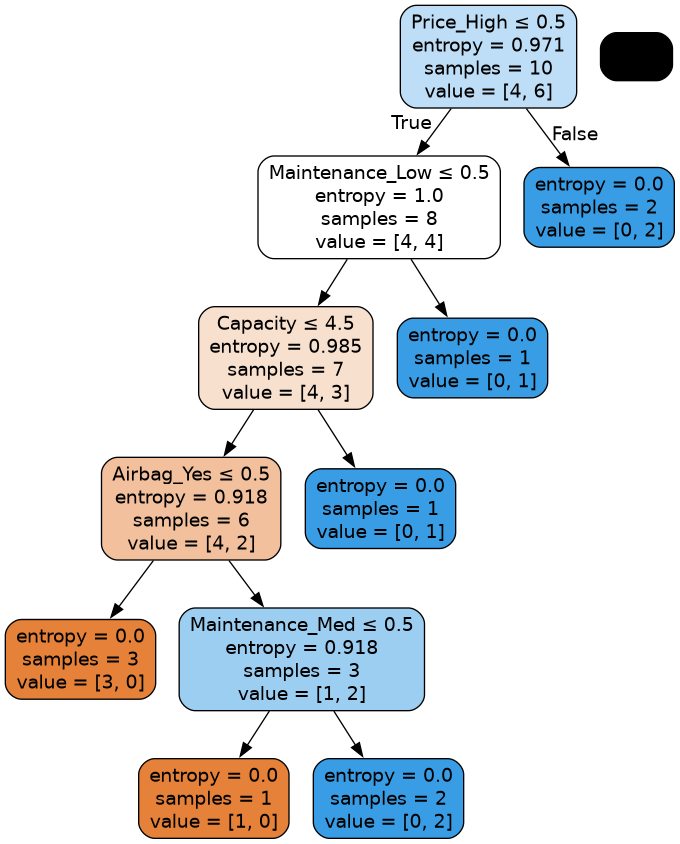

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from io import StringIO
from IPython.display import Image
import pydotplus

# Define the dataset
data = {
    'Price': ['Low', 'Low', 'Low', 'Low', 'Low', 'Med', 'Med', 'Med', 'Med', 'High', 'High', 'High', 'High'],
    'Maintenance': ['Low', 'Med', 'Low', 'Med', 'High', 'Med', 'Med', 'High', 'High', 'Med', 'Med', 'High', 'High'],
    'Capacity': ['2', '4', '4', '4', '4', '4', '4', '2', '5', '4', '2', '2', '5'],
    'Airbag': ['No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Profitable': [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# Convert categorical variables into numerical ones
df = pd.get_dummies(df, columns=['Price', 'Maintenance', 'Airbag'])

# Separate features and target variable
X = df.drop('Profitable', axis=1)
y = df['Profitable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
